Caminho encontrado: Piracicaba -> Tiete -> Porto Feliz
Distância total percorrida: 65


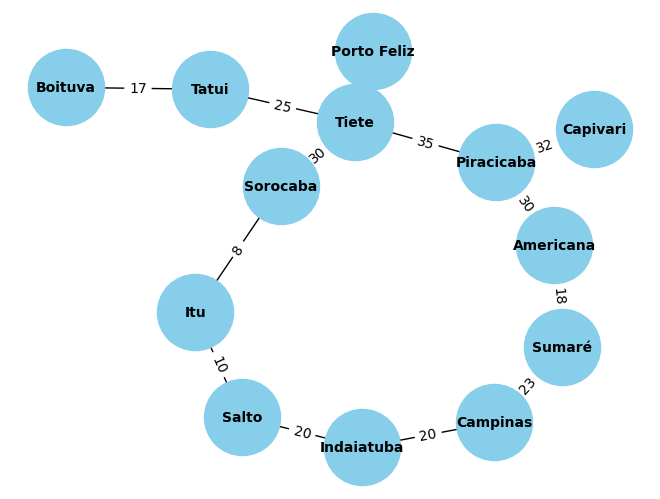

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict, deque

class Graph:
    """Representa um grafo não direcionado."""

    def __init__(self):
        # Inicializa o grafo como um dicionário padrão de listas vazias
        self.graph = defaultdict(list)

    def add_edge(self, u, v, weight=None):
        # Adiciona uma aresta entre os vértices u e v, opcionalmente com um peso
        self.graph[u].append((v, weight))
        self.graph[v].append((u, weight))  # Para um grafo não direcionado

    def bfs(self, start, goal):
        # Realiza uma busca em largura a partir do vértice de início até o objetivo
        queue = deque([(start, [start])])  # Inicializa a fila com o vértice de início e seu caminho
        visited = set([start])  # Inicializa o conjunto de vértices visitados

        while queue:
            vertex, path = queue.popleft()  # Retira o primeiro elemento da fila
            if vertex == goal:
                return path  # Retorna o caminho se o objetivo for encontrado
            for neighbour, _ in self.graph[vertex]:
                if neighbour not in visited:
                    visited.add(neighbour)
                    queue.append((neighbour, path + [neighbour]))  # Adiciona o vizinho à fila

    def dfs_util(self, v, visited, path, goal):
        # Função utilitária para a busca em profundidade recursiva
        visited.add(v)
        path.append(v)
        if v == goal:
            return True  # Retorna True se o objetivo for encontrado
        for neighbour, _ in self.graph[v]:
            if neighbour not in visited:
                if self.dfs_util(neighbour, visited, path, goal):
                    return True  # Retorna True se o objetivo for encontrado
        path.pop()  # Desfaz a última adição ao caminho se o objetivo não for encontrado
        return False

    def dfs(self, start, goal):
        # Realiza uma busca em profundidade a partir do vértice de início até o objetivo
        visited = set()
        path = []
        self.dfs_util(start, visited, path, goal)
        return path

    def calculate_distance(self, path):
        # Calcula a distância total percorrida ao longo do caminho
        distance = 0
        for i in range(len(path) - 1):
            for v, w in self.graph[path[i]]:
                if v == path[i + 1]:
                    distance += w
                    break  # Parar o loop quando encontrada a aresta
        return distance if distance > 0 else "Não foi possível encontrar um caminho válido"
    
    def draw(self):
        # Desenha o grafo
        G = nx.Graph()
        for u in self.graph:
            for v, w in self.graph[u]:
                G.add_edge(u, v, weight=w)
        pos = nx.spring_layout(G)
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color="skyblue", font_size=10, font_weight="bold")
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
        plt.show()


if __name__ == "__main__":
    g = Graph()

    # Adiciona as arestas entre as cidades com os respectivos pesos
    g.add_edge("Piracicaba", "Americana", 30)
    g.add_edge("Piracicaba", "Capivari", 32)
    g.add_edge("Piracicaba", "Tiete", 35)
    g.add_edge("Americana", "Sumaré", 18)
    g.add_edge("Sumaré", "Campinas", 23)
    g.add_edge("Campinas", "Indaiatuba", 20)
    g.add_edge("Indaiatuba", "Salto", 20)
    g.add_edge("Salto", "Itu", 10)
    g.add_edge("Itu", "Sorocaba", 8)
    g.add_edge("Sorocaba", "Tiete", 30)
    g.add_edge("Tiete", "Porto Feliz", 30)
    g.add_edge("Tiete", "Tatui", 25)
    g.add_edge("Tatui", "Boituva", 17)
    # Adiciona mais arestas...

    # Solicita ao usuário a cidade de origem, a cidade de destino e o algoritmo de busca a ser utilizado
    origem = input("Digite a cidade de origem: ").strip()
    destino = input("Digite a cidade de destino: ").strip()
    algoritmo = input("Escolha o algoritmo de busca (BFS ou DFS): ").strip().lower()

    # Executa o algoritmo de busca escolhido
    if algoritmo == "bfs":
        path = g.bfs(origem, destino)
    elif algoritmo == "dfs":
        path = g.dfs(origem, destino)
    else:
        print("Algoritmo de busca inválido. Por favor, escolha entre BFS ou DFS.")
        exit(1)

    # Imprime o caminho encontrado e a distância total percorrida, se houver
    if path:
        print("Caminho encontrado:", " -> ".join(path))
        print("Distância total percorrida:", g.calculate_distance(path))
    else:
        print("Não foi possível encontrar um caminho de {} até {}".format(origem, destino))

    # Desenha o grafo
    g.draw()
